In [115]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np

In [4]:
from matplotlib import pyplot as plt

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
print(x_train.shape)

(60000, 28, 28)


(28, 28)


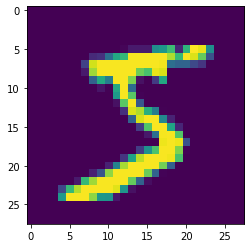

In [55]:
plt.imshow(x_train[0])
print(x_train[0].shape)

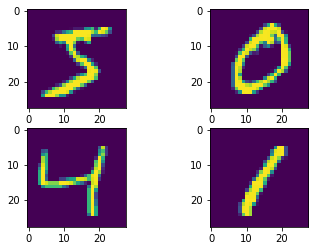

In [33]:
f, ax = plt.subplots(2,2)
ax[0,0].imshow(x_train[0])
ax[0,1].imshow(x_train[1])
ax[1,0].imshow(x_train[2])
ax[1,1].imshow(x_train[3])

In [38]:
x_train.max()

255

In [51]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [52]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [53]:
print(y_train.shape)

(60000, 10)


In [54]:
print(y_train[0:4])
print(y_test[0])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [57]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [64]:
model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2907 - accuracy: 0.9152
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1409 - accuracy: 0.9580
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1052 - accuracy: 0.9685
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0751 - accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0569 - accuracy: 0.9820
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0530 - accuracy: 0.9826
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0490 - accuracy: 0.9840
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.044

In [65]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9797


[0.070680171251297, 0.9797000288963318]

In [129]:
x_test0 = x_test[0:10000].reshape(-1,28,28)

In [130]:
prediction = model.predict(x_test0)
print(prediction)

[[3.97912175e-10 1.32863376e-09 3.15272097e-09 ... 9.99981761e-01
  5.05999331e-08 1.59262731e-06]
 [7.02176539e-10 3.72022373e-06 9.99995589e-01 ... 1.86046571e-21
  2.95446423e-09 1.23336031e-16]
 [3.61218766e-09 9.98404086e-01 5.98657170e-05 ... 1.32412242e-03
  1.92129781e-04 1.72796433e-09]
 ...
 [2.28970922e-17 1.09187705e-14 5.65711198e-15 ... 3.94437819e-07
  1.10579823e-09 1.54197977e-07]
 [1.76896009e-09 1.58554160e-15 8.67914512e-15 ... 8.52898481e-12
  5.19898791e-08 5.19080980e-13]
 [7.46043449e-10 1.81164863e-17 1.73924775e-09 ... 1.44538782e-15
  4.16522502e-13 1.59652863e-13]]


In [144]:
from numpy import argmax
#plt.imshow(x_test[10])
print(argmax(prediction, axis=1 ))

[7 2 1 ... 4 5 6]


In [128]:
print(x_test.shape)

(10000, 28, 28)
